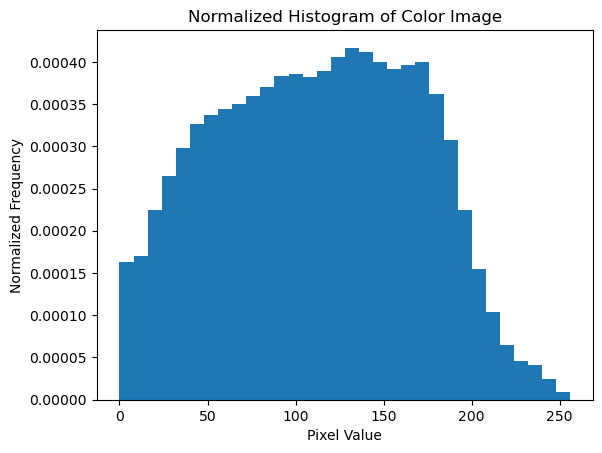

im (600, 800, 3)


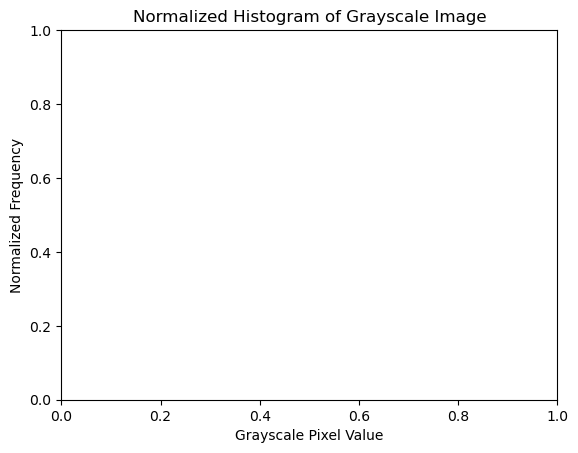

In [6]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd

#Plot Histogram with Bin: https://www.geeksforgeeks.org/bin-size-in-matplotlib-histogram/
#Read img with opencv: https://www.geeksforgeeks.org/python-opencv-getting-and-setting-pixels/


def computeNormGrayHistogram(img):

    #Take in the given image, get a grayscale version of it
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #Flatten the 2D array to make it one long list of pixel values
    gray = np.ndarray.flatten(np.array(gray))

    #elementAmount = len(gray)
    #print(len(gray))
    #print(gray)

    #split up the bin intervals from 0 to 255 across 32 values and plot the greyscale histogram 
    interv = np.linspace(0,255,num = 32)
    #print(interv)
    #hist_out = plt.hist(gray, interv, density=True) #density controls whether the histogram gets normalized to 1 or not.
    hist_out = custom_hist(gray,True)
    plt.title("Normalized Histogram of Grayscale Image")
    plt.xlabel("Grayscale Pixel Value")
    plt.ylabel("Normalized Frequency")

    return hist_out

def custom_hist(pixel_vals, normalized):
    temp_vals = pixel_vals
    bins = np.zeros(32)
    sum_val = 0
    for i in range(32):
        for j in temp_vals:
            if j < (((i+1)*8)) and j > ((i)*8):
                bins[i] += 1
                sum_val += j
    if normalized:
        bins = bins/sum_val
    plt.bar(np.arange(0, 256, 8), bins, align="edge", width=8)
    plt.title("Normalized Histogram of Color Image")
    plt.xlabel("Pixel Value")
    plt.ylabel("Normalized Frequency")
    plt.show()
    return 0

def custom_hist_color(red_val, blue_val, green_val, normalized):

    bins_r, bins_g, bins_b = np.zeros(32), np.zeros(32), np.zeros(32)
    sum_val_red = 0
    sum_val_blue = 0
    sum_val_green = 0
    for i in range(32):
        for j in red_val:
            if j < ((i+1)*8) and j > ((i)*8):
                bins_r[i] += 1
                sum_val_red += j
        for k in green_val:
            if k < ((i+1)*8) and k > ((i)*8):
                bins_g[i] += 1
                sum_val_green += j
        for l in blue_val:
            if l < ((i+1)*8) and l > ((i)*8):
                bins_b[i] += 1
                sum_val_blue += l
    if normalized:
        bins_r, bins_g, bins_b = bins_r/sum_val_red, bins_g/sum_val_green, bins_b/sum_val_blue
    fig,a = plt.subplots(1,3, sharey=True, squeeze=False)
    a[0][0].bar(np.arange(0, 256, 8), bins_r, align="edge", width=8, color="red")
    print(bins_r[30], bins_r[31])
    #plt.subplots(1,3,2, squeeze=True)
    a[0][1].bar(np.arange(0, 256, 8), bins_g, align="edge", width=8, color="green")
    #plt.subplots(1,3,3, squeeze=True)
    a[0][2].bar(np.arange(0, 256, 8), bins_b, align="edge", width=8, color="blue")
    plt.title("Normalized Histogram of Color Image")
    plt.xlabel("Pixel Value")
    plt.ylabel("Normalized Frequency")
    
    plt.show()
    return 0

            


def computeNormRGBHistogram(img):
    '''
    #Visual of img
    cv2.imshow('but',img)
    cv2.waitKey(1000)
    cv2.destroyAllWindows()
    #print(img)
    
    #visual of red image
    red = img
    red[:,:,2] = 0
    red[:,:,0] = 0
    #print(img)
    cv2.imshow('red', red)
    cv2.waitKey(1000)
    cv2.destroyAllWindows()
    '''
    #Get each set of color value of the image pixels. Flatten these arrays.
    bluvals, grnvals, redvals = img[:,:,0], img[:,:,1], img[:,:,2]
    print(bluvals)
    #print(redvals)
    bluvals, grnvals, redvals = np.ndarray.flatten(bluvals), np.ndarray.flatten(grnvals), np.ndarray.flatten(redvals)

    #Define bin interval
    interv = np.linspace(0,255,num = 32)
    #print(interv)

    #Plot historgram of color values (normalized to 1)
    #hist_out = plt.hist([redvals,grnvals,bluvals], interv, label=["Red", "Green", "Blue"], color=["Red", "Green", "Blue"], density=True)
    #hist_out = plt.bar(red)
    hist_out = custom_hist_color(redvals, bluvals, grnvals, True)
    plt.title("Normalized Histogram of Color Image")
    plt.xlabel("Pixel Value")
    plt.ylabel("Normalized Frequency")

    '''
    red = np.ndarray.flatten(np.array(image[0]))
    elementAmount = len(gray)
    print(len(gray))
    print(gray)
    interv = np.linspace(0,255,num = 32)
    print(interv)
    hist_out = plt.hist(gray, interv, density=True)
    plt.title("Normalized Histogram of Grayscale Image")
    plt.xlabel("Grayscale Pixel Value")
    plt.ylabel("Normalized Frequency")
    '''
    hist_out = 0
    return hist_out


img = cv2.imread('forest.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
'''
cv2.imshow("Normal", img)
cv2.waitKey(2000)
cv2.destroyAllWindows()
'''

hist = computeNormGrayHistogram(img)



im = cv2.imread('beach.png')
print("im",np.shape(im))


#computeNormRGBHistogram(img)

#plt.plot(hist[0], hist[1])


In [13]:
img = cv2.imread("beach.png", cv2.IMREAD_GRAYSCALE)


def adaptiveHistEq(img, winSize):

    #get img padding amount
    pad_amount = int(winSize/2)
    rank = 0
    output_img = img

    #create padded image
    img_padded = cv2.copyMakeBorder(img, pad_amount, pad_amount, pad_amount, pad_amount, cv2.BORDER_REFLECT)
    array_padded = np.array(img_padded)

    #get image and padded image dimensions
    imRow, imCol = np.shape(img)[0:2]
    imRow_p, imCol_p = np.shape(img_padded)[0:2]

    for y in range(imRow):
        for x in range(imCol):
            rank = 0
            '''
            for j in range(winSize):
                for i in range(winSize):
                    if img[y,x] > img_padded[y+j, x+i]:
                        rank = rank + 1
            output_img[y,x] = rank * (255/(winSize*winSize))
            '''
            cur_win = array_padded[y:y+winSize:1,x:x+winSize:1]
            rank =  np.sum(img[y,x] > cur_win)
            output_img[y, x] = rank * (255/(winSize*winSize))
    return output_img

equalized_img = adaptiveHistEq(img, 129)

cv2.imshow("img equalized", equalized_img)
cv2.waitKey(5000)
cv2.destroyAllWindows()

In [ ]:
img = cv2.imread("beach.png", cv2.IMREAD_GRAYSCALE)
simple_eq_im = cv2.equalizeHist(img)
cv2.imshow("img equalized", simple_eq_im)
cv2.waitKey(5000)
cv2.destroyAllWindows()

[[13  0  7 ... 70 41 20]
 [ 0  0 15 ... 31 15  6]
 [19 26 35 ... 10  9  9]
 ...
 [10 18 29 ...  0  0  2]
 [ 7 14 24 ... 14  6 14]
 [ 2  8 17 ... 27 15 28]]
2.0783291247393194e-05 2.436847637826647e-05


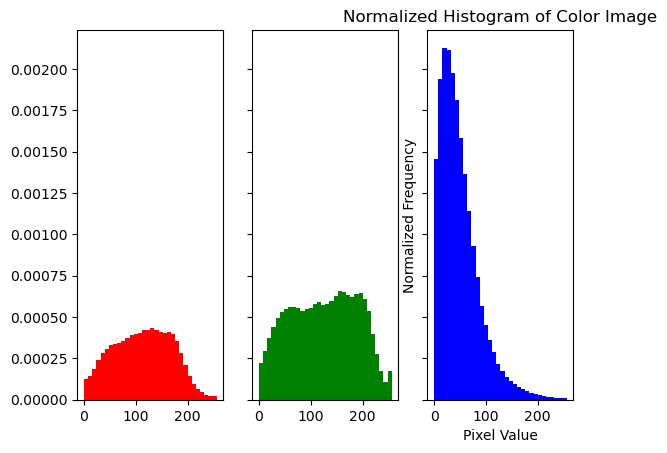

0

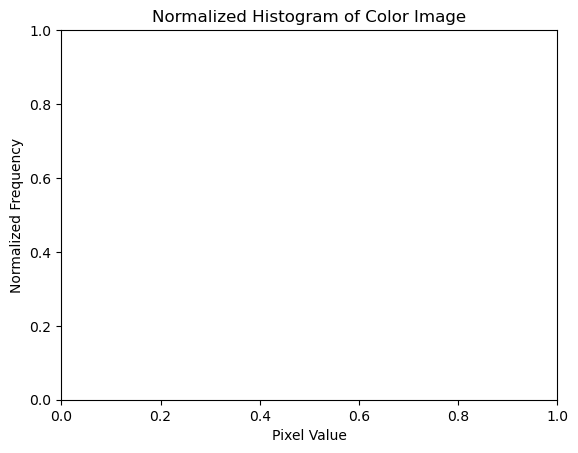

In [9]:
img = cv2.imread('forest.jpg')
computeNormRGBHistogram(img)
#plt.show()

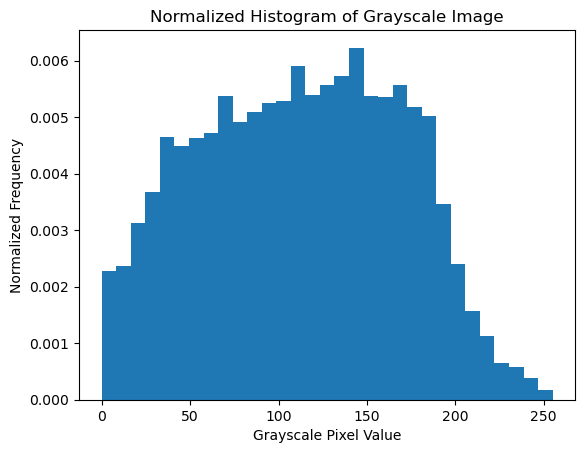

In [21]:
#plot histograms of the image flipped horizontally
img_flipped = cv2.flip(img, 1)

cv2.imshow("Flipped", img_flipped)
cv2.waitKey(2000)
cv2.destroyAllWindows()

computeNormRGBHistogram(img_flipped)
plt.show()
hist = computeNormGrayHistogram(img_flipped)
plt.show()

[[ 24   0  12 ... 134  80  38]
 [  0   0  28 ...  56  28  10]
 [ 36  50  68 ...  14  16  16]
 ...
 [144 160 178 ...  76  68  74]
 [138 152 168 ... 106  84  98]
 [128 140 154 ... 132 102 126]]
[[13  0  7 ... 70 41 20]
 [ 0  0 15 ... 31 15  6]
 [19 26 35 ... 10  9  9]
 ...
 [10 18 29 ...  0  0  2]
 [ 7 14 24 ... 14  6 14]
 [ 2  8 17 ... 27 15 28]]
0.00010504645005283 0.0025715618870160045


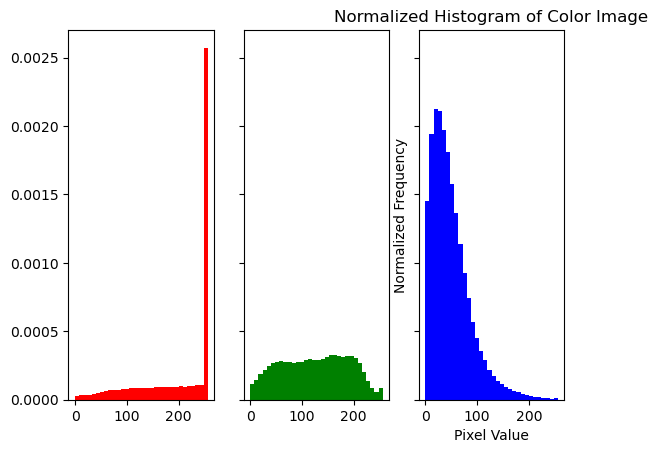

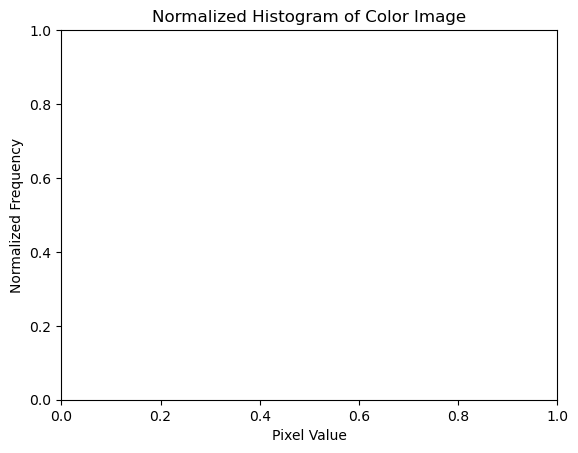

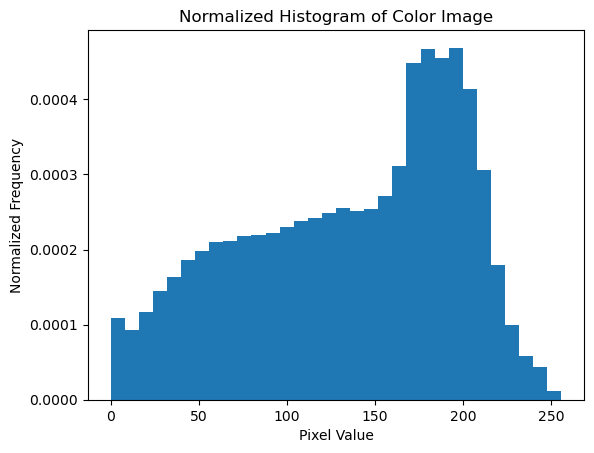

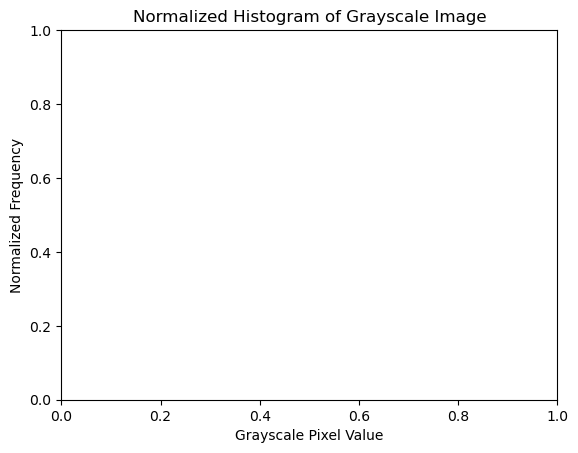

In [7]:
img = cv2.imread('forest.jpg')
img_double_red = img
#print(img[:,:,2])
#print(np.shape(img))

#initialize iterators to check each pixel's red value
row = 0
col = 0

#loop thru all red values. double the value up to a max of 255. If the doubled value exceeds 255, just set it to 255.
#Put these red values into the red values of our new image
for i in img[:,:,2]:
    col = 0
    #print(np.shape(i))
    
    for k in i:
        #print(np.shape(k))
        #print(k)
        if 2*k<255:
            img_double_red[row,col,2] = 2*k
        else:
            img_double_red[row,col,2] = 255
        col = col +1
    row = row+1
#print(count)
print(img[:,:,2])

cv2.imshow("Red Doubled", img_double_red)
cv2.waitKey(2000)
cv2.destroyAllWindows()

computeNormRGBHistogram(img_double_red)
plt.show()

hist = computeNormGrayHistogram(img_double_red)
plt.show()